In [3]:
import numpy as np
import pandas as pd

#read and obtain data
data = pd.read_csv('transactions_data.csv')

        

In [4]:
#handles missing values 
data.isnull().sum()

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

In [5]:
data['errors'].unique()

array([nan, 'Technical Glitch', 'Bad Expiration', 'Bad Card Number',
       'Insufficient Balance', 'Bad PIN', 'Bad CVV', 'Bad Zipcode',
       'Insufficient Balance,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad PIN,Technical Glitch',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration',
       'Bad Card Number,Insufficient Balance',
       'Bad Expiration,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Technical Glitch', 'Bad Expiration,Bad CVV',
       'Bad CVV,Insufficient Balance', 'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance',
       'Bad Card Number,Bad Expiration,Insufficient Balance',
       'Bad Zipcode,Technical Glitch'], dtype=object)

In [6]:
data.describe()

,id,client_id,card_id,merchant_id,zip,mcc
count,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.165321e+07,1.330592e+07
mean,1.558402e+07,1.026812e+03,3.475268e+03,4.772376e+04,5.132782e+04,5.565440e+03
std,4.704499e+06,5.816386e+02,1.674356e+03,2.581534e+04,2.940423e+04,8.757002e+02
min,7.475327e+06,0.000000e+00,0.000000e+00,1.000000e+00,1.001000e+03,1.711000e+03
25%,1.150604e+07,5.190000e+02,2.413000e+03,2.588700e+04,2.860200e+04,5.300000e+03
50%,1.557087e+07,1.070000e+03,3.584000e+03,4.592600e+04,4.767000e+04,5.499000e+03
75%,1.965361e+07,1.531000e+03,4.901000e+03,6.757000e+04,7.790100e+04,5.812000e+03
max,2.376187e+07,1.998000e+03,6.144000e+03,1.003420e+05,9.992800e+04,9.402000e+03


In [7]:
data.dtypes

id                  int64
date               object
client_id           int64
card_id             int64
amount             object
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
dtype: object

In [8]:
data.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
13305910    False
13305911    False
13305912    False
13305913    False
13305914    False
Length: 13305915, dtype: bool

In [9]:
f_data = data

In [10]:
#Replace the missing value with '0' using 'fiilna' method
f_data['merchant_state'] = data['merchant_state'].fillna("online")


In [11]:
data.isnull().sum()

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state           0
zip                1652706
mcc                      0
errors            13094522
dtype: int64

In [12]:
f_data.dtypes

id                  int64
date               object
client_id           int64
card_id             int64
amount             object
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
dtype: object

In [13]:
f_data['zip'] = data['zip'].fillna(0)

In [14]:
f_data.dtypes

id                  int64
date               object
client_id           int64
card_id             int64
amount             object
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
dtype: object

In [15]:
f_data['errors'] = data['errors'].fillna("unknown")

In [16]:
#covert date which is a string to datetime objects
f_data["date"] = pd.to_datetime(f_data["date"])
f_data["date"]                               

0          2010-01-01 00:01:00
1          2010-01-01 00:02:00
2          2010-01-01 00:02:00
3          2010-01-01 00:05:00
4          2010-01-01 00:06:00
                   ...        
13305910   2019-10-31 23:56:00
13305911   2019-10-31 23:56:00
13305912   2019-10-31 23:57:00
13305913   2019-10-31 23:58:00
13305914   2019-10-31 23:59:00
Name: date, Length: 13305915, dtype: datetime64[ns]

In [17]:
#splitting the datetime object to month,day,and time
f_data["month"] = f_data["date"].dt.month
f_data.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,unknown,1
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,unknown,1
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,unknown,1
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,unknown,1
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,unknown,1


In [18]:
f_data["day"] = f_data["date"].dt.day
f_data["second"] = f_data["date"].dt.second
f_data["minute"] = f_data["date"].dt.minute
f_data.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,day,second,minute
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,unknown,1,1,0,1
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,unknown,1,1,0,2
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,unknown,1,1,0,2
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,unknown,1,1,0,5
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,unknown,1,1,0,6


In [19]:
#splitting the datetime object to hour
f_data["hour"] = f_data["date"].dt.hour
f_data.head(10)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,day,second,minute,hour
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,unknown,1,1,0,1,0
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,unknown,1,1,0,2,0
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,unknown,1,1,0,2,0
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,unknown,1,1,0,5,0
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,unknown,1,1,0,6,0
5,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,unknown,1,1,0,7,0
6,7475334,2010-01-01 00:09:00,1556,2972,$77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,unknown,1,1,0,9,0
7,7475335,2010-01-01 00:14:00,1684,2140,$26.46,Online Transaction,39021,ONLINE,online,0.0,4784,unknown,1,1,0,14,0
8,7475336,2010-01-01 00:21:00,335,5131,$261.58,Online Transaction,50292,ONLINE,online,0.0,7801,unknown,1,1,0,21,0
9,7475337,2010-01-01 00:21:00,351,1112,$10.74,Swipe Transaction,3864,Flushing,NY,11355.0,5813,unknown,1,1,0,21,0


In [20]:
#dropping datetime since we do not need it anymore
f_data = f_data.drop(columns="date")

In [21]:
f_data.head(5)

,id,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,day,second,minute,hour
0,7475327,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,unknown,1,1,0,1,0
1,7475328,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,unknown,1,1,0,2,0
2,7475329,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,unknown,1,1,0,2,0
3,7475331,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,unknown,1,1,0,5,0
4,7475332,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,unknown,1,1,0,6,0


In [22]:
f_data.dtypes

id                  int64
client_id           int64
card_id             int64
amount             object
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
month               int32
day                 int32
second              int32
minute              int32
hour                int32
dtype: object

In [23]:
#encoding use_chip using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
encodertransform = encoder.fit_transform(f_data[['use_chip']])
f_data = pd.concat([f_data, encodertransform], axis=1).drop(columns ='use_chip')
f_data.head()

,id,client_id,card_id,amount,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,day,second,minute,hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction
0,7475327,1556,2972,$-77.00,59935,Beulah,ND,58523.0,5499,unknown,1,1,0,1,0,0.0,0.0,1.0
1,7475328,561,4575,$14.57,67570,Bettendorf,IA,52722.0,5311,unknown,1,1,0,2,0,0.0,0.0,1.0
2,7475329,1129,102,$80.00,27092,Vista,CA,92084.0,4829,unknown,1,1,0,2,0,0.0,0.0,1.0
3,7475331,430,2860,$200.00,27092,Crown Point,IN,46307.0,4829,unknown,1,1,0,5,0,0.0,0.0,1.0
4,7475332,848,3915,$46.41,13051,Harwood,MD,20776.0,5813,unknown,1,1,0,6,0,0.0,0.0,1.0


In [24]:
f_data['merchant_city'].value_counts()

merchant_city
ONLINE          1563700
Houston          146917
Miami             87388
Brooklyn          84020
Los Angeles       82004
                 ...   
Mc Caskill            1
Anchor Point          1
Geddes                1
Rimforest             1
King Ferry            1
Name: count, Length: 12492, dtype: int64

In [25]:
#label encoding of merchant_city and merchant_state
from sklearn.preprocessing import LabelEncoder

city_encoder = LabelEncoder()
f_data['merchant_city'] = city_encoder.fit_transform(f_data['merchant_city'])


In [26]:
state_encoder = LabelEncoder()
f_data['merchant_state'] = state_encoder.fit_transform(f_data['merchant_state'])

In [27]:
f_data.head(10)

,id,client_id,card_id,amount,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,day,second,minute,hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction
0,7475327,1556,2972,$-77.00,59935,842,117,58523.0,5499,unknown,1,1,0,1,0,0.0,0.0,1.0
1,7475328,561,4575,$14.57,67570,841,67,52722.0,5311,unknown,1,1,0,2,0,0.0,0.0,1.0
2,7475329,1129,102,$80.00,27092,11626,24,92084.0,4829,unknown,1,1,0,2,0,0.0,0.0,1.0
3,7475331,430,2860,$200.00,27092,2526,70,46307.0,4829,unknown,1,1,0,5,0,0.0,0.0,1.0
4,7475332,848,3915,$46.41,13051,4711,94,20776.0,5813,unknown,1,1,0,6,0,0.0,0.0,1.0
5,7475333,1807,165,$4.81,20519,1265,123,10464.0,5942,unknown,1,1,0,7,0,0.0,0.0,1.0
6,7475334,1556,2972,$77.00,59935,842,117,58523.0,5499,unknown,1,1,0,9,0,0.0,0.0,1.0
7,7475335,1684,2140,$26.46,39021,8040,199,0.0,4784,unknown,1,1,0,14,0,0.0,1.0,0.0
8,7475336,335,5131,$261.58,50292,8040,199,0.0,7801,unknown,1,1,0,21,0,0.0,1.0,0.0
9,7475337,351,1112,$10.74,3864,3739,123,11355.0,5813,unknown,1,1,0,21,0,0.0,0.0,1.0


In [28]:
#group by user
user_group = f_data.groupby('client_id')

In [29]:
#clean amount
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)
f_data['amount'] = f_data['amount'].apply(clean_currency).astype('float')


In [30]:
f_data.head()

,id,client_id,card_id,amount,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,day,second,minute,hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction
0,7475327,1556,2972,-77.00,59935,842,117,58523.0,5499,unknown,1,1,0,1,0,0.0,0.0,1.0
1,7475328,561,4575,14.57,67570,841,67,52722.0,5311,unknown,1,1,0,2,0,0.0,0.0,1.0
2,7475329,1129,102,80.00,27092,11626,24,92084.0,4829,unknown,1,1,0,2,0,0.0,0.0,1.0
3,7475331,430,2860,200.00,27092,2526,70,46307.0,4829,unknown,1,1,0,5,0,0.0,0.0,1.0
4,7475332,848,3915,46.41,13051,4711,94,20776.0,5813,unknown,1,1,0,6,0,0.0,0.0,1.0


In [49]:
#to determine rare merchant_id
r = f_data['merchant_id'].value_counts()
r.tail(20)

merchant_id
46502    1
42104    1
99558    1
34293    1
5252     1
14127    1
26838    1
68607    1
81299    1
90433    1
24445    1
10372    1
75843    1
2468     1
35873    1
69581    1
80536    1
49000    1
92931    1
30614    1
Name: count, dtype: int64

<Axes: xlabel='amount'>

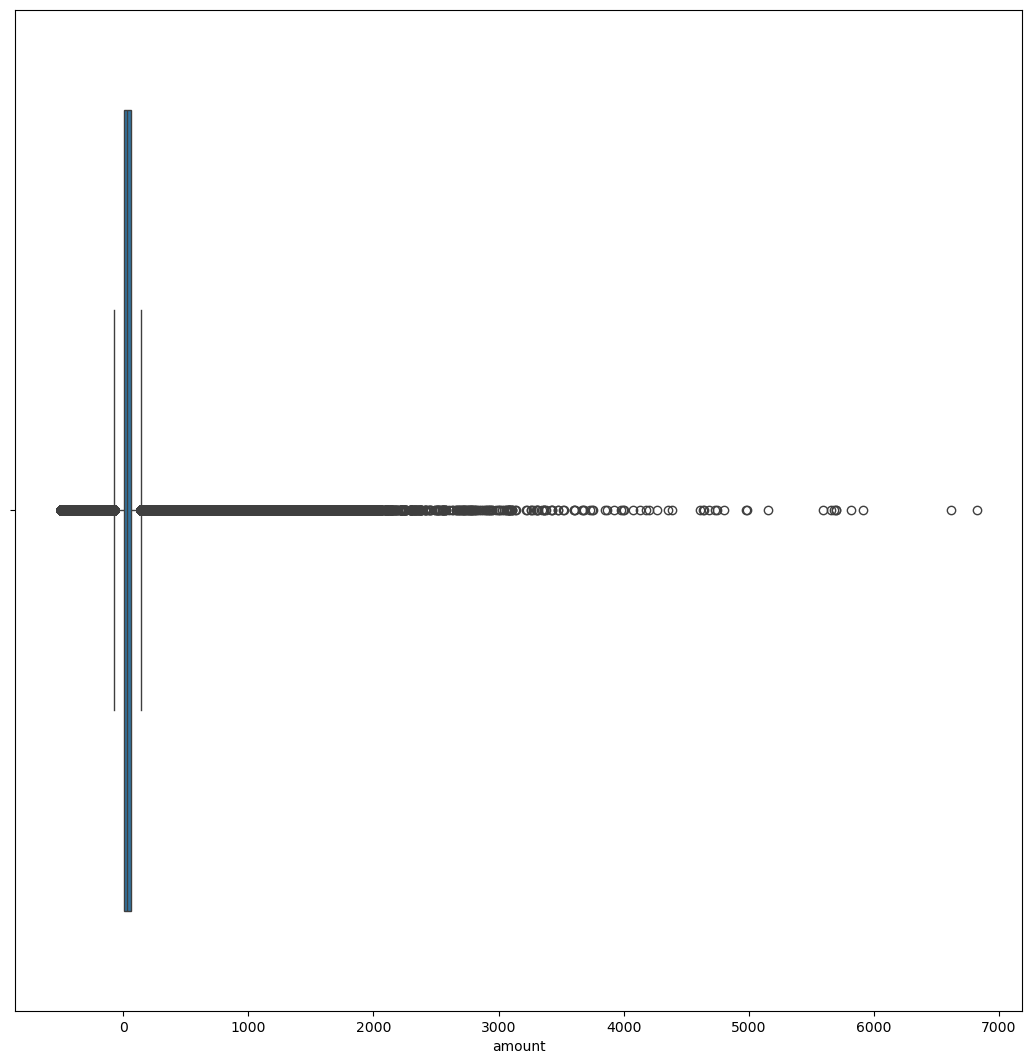

In [46]:
#determine the large amount
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13,13))
sns.boxplot(x="amount",data=f_data)

In [50]:
f_data['merchant_city'].value_counts()

merchant_city
8040    1563700
5107     146917
7038      87388
1278      84020
6371      82004
         ...   
6842          1
229           1
4090          1
9419          1
5663          1
Name: count, Length: 12492, dtype: int64

In [32]:
x_train=f_data.drop(columns='errors')

In [33]:
user_1556 = f_data[f_data['client_id'] == 1556]
user_1556

,id,client_id,card_id,amount,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,day,second,minute,hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction
0,7475327,1556,2972,-77.00,59935,842,117,58523.0,5499,unknown,1,1,0,1,0,0.0,0.0,1.0
6,7475334,1556,2972,77.00,59935,842,117,58523.0,5499,unknown,1,1,0,9,0,0.0,0.0,1.0
12,7475340,1556,2972,39.63,59935,842,117,58523.0,5499,unknown,1,1,0,26,0,0.0,0.0,1.0
1511,7477136,1556,2972,15.05,32076,907,117,58504.0,5813,unknown,1,1,0,5,12,0.0,0.0,1.0
2140,7477894,1556,2972,21.38,16798,8040,199,0.0,4121,unknown,1,1,0,45,14,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13299903,23754426,1556,4333,15.88,32076,907,117,58504.0,5813,unknown,10,30,0,11,12,1.0,0.0,0.0
13300340,23754981,1556,4333,5.35,20519,7674,117,58647.0,5942,unknown,10,30,0,4,14,1.0,0.0,0.0
13301395,23756272,1556,2972,5.65,43632,907,117,58504.0,5310,unknown,10,30,0,18,19,1.0,0.0,0.0
13305435,23761271,1556,2972,5.16,37972,907,117,58504.0,5300,unknown,10,31,0,19,19,1.0,0.0,0.0


In [34]:
user_1556['amount'].unique()

array([-77.  ,  77.  ,  39.63, ..., 117.68, 111.55,   5.35])

In [35]:
u=user_1556[user_1556['errors'] != "unknown"]
u

,id,client_id,card_id,amount,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,day,second,minute,hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction
273365,7802277,1556,2972,16.19,21956,907,117,58504.0,4121,Insufficient Balance,3,24,0,55,14,0.0,0.0,1.0
713055,8329313,1556,4333,177.59,2363,907,117,58504.0,4900,Bad PIN,8,1,0,55,10,0.0,0.0,1.0
871059,8519309,1556,4333,-82.00,59935,842,117,58523.0,5499,Insufficient Balance,9,16,0,19,0,0.0,0.0,1.0
1123277,8823837,1556,4333,160.46,86369,8040,199,0.0,4899,Bad Expiration,11,28,0,27,8,0.0,1.0,0.0
1379462,9134726,1556,4333,100.00,27092,8265,49,32807.0,4829,Insufficient Balance,2,9,0,14,17,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973200,23350678,1556,4333,17.61,18563,8040,199,0.0,4121,Bad CVV,8,5,0,45,14,0.0,1.0,0.0
13038016,23430814,1556,2972,18.31,16798,8040,199,0.0,4121,Bad Expiration,8,22,0,55,14,0.0,1.0,0.0
13161040,23582762,1556,4333,109.36,22204,907,117,58504.0,5541,Insufficient Balance,9,23,0,15,16,1.0,0.0,0.0
13161064,23582793,1556,4333,70.72,22204,907,117,58504.0,5541,Bad Zipcode,9,23,0,22,16,1.0,0.0,0.0


In [36]:
u=f_data[f_data['client_id'] == 0]
u

,id,client_id,card_id,amount,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,day,second,minute,hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction
1795,7477483,0,4639,33.96,20519,8995,95,4101.0,5942,unknown,1,1,0,10,13,0.0,0.0,1.0
2960,7478861,0,4639,7.78,55060,9995,95,4074.0,5812,unknown,1,1,0,39,19,0.0,0.0,1.0
3299,7479264,0,4639,65.86,32164,9995,95,4074.0,5813,unknown,1,1,0,13,22,0.0,0.0,1.0
4955,7481226,0,4639,55.85,26909,10651,95,4084.0,5211,unknown,1,2,0,8,13,0.0,0.0,1.0
8801,7485861,0,4639,1.37,14528,9995,95,4074.0,5499,unknown,1,3,0,44,15,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13298246,23752390,0,1271,60.97,32164,9995,95,4074.0,5813,unknown,10,29,0,13,22,1.0,0.0,0.0
13300208,23754811,0,1271,59.71,16256,9995,95,4074.0,5211,unknown,10,30,0,25,13,1.0,0.0,0.0
13302574,23757681,0,1271,86.65,60569,6165,95,4240.0,5300,unknown,10,31,0,37,7,1.0,0.0,0.0
13303526,23758864,0,1271,21.89,83480,9995,95,4074.0,9402,unknown,10,31,0,5,11,1.0,0.0,0.0


<Axes: xlabel='amount', ylabel='Count'>

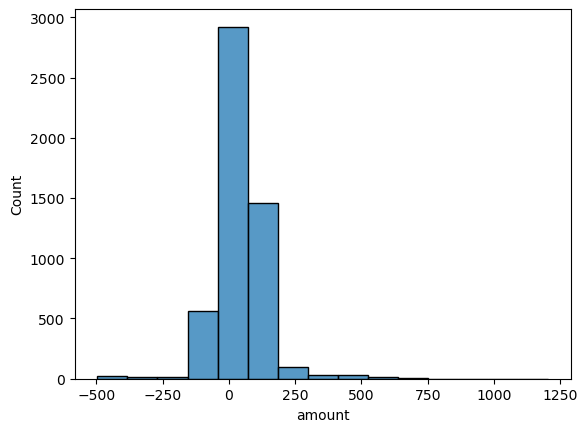

In [37]:
import seaborn as sns
sns.histplot(user_1556['amount'],bins=15)

In [38]:
q1 = np.quantile(user_1556['amount'], 0.25)
q3 = np.quantile(user_1556['amount'], 0.75)
med = np.median(user_1556['amount'])

iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


70.4475 185.98375000000001 -95.80625000000002


In [39]:
if(amount < lower_bound | amount > upper_bound):
    risk = high
    return risk

SyntaxError: 'return' outside function (3258460418.py, line 3)

In [ ]:
data['client_id'].unique()

In [ ]:
 # Extract date from timestamp
#data['date'] = data['date'].dt.date 
daily_spending = data.groupby(['client_id','date']).agg(
    total_spent=('amount', 'sum'),
    num_transactions=('amount', 'count')
).reset_index()

daily_spending.groupby('client_id')['num_transaction'].mean()


In [ ]:
k = daily_spending.groupby('client_id')['num_transactions'].mean()
k

In [ ]:
outliers = r[r['Average Cost for two'] <= lower_bound]['Average Cost for two'].count()
outliers2 = r[r['Average Cost for two'] >= upper_bound]['Average Cost for two'].count()
print('Number of lower outliers is {} and number of upper outliers is {}'.format (outliers, outliers2))

In [ ]:
f_data['errors'].unique()

In [ ]:
f_data.head()

In [ ]:
f_data['merchant_id'].value_counts()

In [41]:
#pre-processing errors column
def encode_errors(x):
    if x == 'unknown' or pd.isna(x):
        return 0
    else:
        return len(str(x).split(','))
f_data['errors_encoded'] = f_data['errors'].apply(encode_errors)

In [59]:
#print out columns where error is more than 1
r = f_data[f_data['errors_encoded'] >= 2]
r.head()

,id,client_id,card_id,amount,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,day,second,minute,hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction,daily_spending,errors_encoded
21231,7500793,1356,5480,53.69,83989,2199,193,54730.0,5310,"Insufficient Balance,Technical Glitch",1,7,0,7,12,0.0,0.0,1.0,11928.21,2
21678,7501348,1495,2922,130.40,41523,5246,70,46256.0,3387,"Insufficient Balance,Technical Glitch",1,7,0,6,14,0.0,0.0,1.0,24236.51,2
24174,7504300,1274,2905,120.00,27092,8540,143,2860.0,4829,"Bad PIN,Insufficient Balance",1,8,0,29,11,0.0,0.0,1.0,31873.75,2
31007,7512452,908,4230,2.40,36088,4054,116,27529.0,5411,"Bad PIN,Technical Glitch",1,10,0,2,13,0.0,0.0,1.0,10679.32,2
36495,7519004,53,3267,20.44,15143,8040,199,0.0,4784,"Bad Expiration,Technical Glitch",1,12,0,52,7,0.0,1.0,0.0,22583.74,2


In [58]:
#client level risk profile table
#transaction type columns
trans_type_cols = [col for col in f_data.columns if col.startswith('use_chip_')]
#obtain the daily spending of a client
f_data['daily_spending'] = f_data.groupby(['client_id', 'day'])['amount'].transform('sum')
#obtain the transaction frequency per day
f_data['freq_per_day'] = f_data.groupby(['client_id', 'day'])['amount'].transform('count')
#obtain the transaction frequency per hour
f_data['freq_per_hour'] = f_data.groupby(['client_id', 'hour'])['amount'].transform('count')
#obtain least card used
f_data['least_card_id'] = f_data.groupby('client_id')['card_id'].transform(lambda x: x.value_counts().idxmin())
#obtain rare merchant id
f_data['rare_merchant_id'] = f_data.groupby('client_id')['merchant_id'].transform(lambda x: x.value_counts().idxmin())
#obtain rare merchant state
f_data['rare_merchant_state'] = f_data.groupby('client_id')['merchant_state'].transform(lambda x: x.value_counts().idxmin())
#obtain unusual client hour
f_data['unusual_client_hour'] = f_data.groupby('client_id')['hour'].transform(lambda x: x.value_counts().idxmin())


agg_dict={
    'amount': ['mean', 'std'], #mean amount spent and the level of deviation
    'card_id': pd.Series.nunique, #how manu unique cards does the client use
    'merchant_id': pd.Series.nunique, #how manu unique merchant does the client transfer to
    'merchant_city': pd.Series.nunique,
    'merchant_state': pd.Series.nunique,
    'hour': pd.Series.mode, #at what hour of the day does the client do transactions
    'errors_encoded': 'sum',  #cumulative errors
    'daily_spending': 'mean', #how much spent in a day
    'unusual_client_hour':'first', #the least hour the client makes a transaction
    'least_card_id': 'first',   #the least card_id the client uses
    'rare_merchant_id': 'first', #the least merchant id the client transacts with
    'rare_merchant_state': 'first',#the least merchant id the client transacts with
    'freq_per_hour': 'max',#the agg number of transactions per hour
    'freq_per_day':  'max'#the agg number of transactions per day

}

#how frequent does this client use the various transaction types
#transaction type aggregate
for col in trans_type_cols:
    agg_dict[col] = 'mean'

# Perform aggregation
client_level_agg = f_data.groupby('client_id').agg(agg_dict)

client_level_agg.reset_index(inplace=True)
client_level_agg.columns = ['_'.join(col).strip('_') for col in client_level_agg.columns.values]
client_level_agg.head(10)

KeyError: "Column(s) ['freq_per_day', 'freq_per_hour', 'least_card_id', 'rare_merchant_id', 'rare_merchant_state', 'unusual_client_hour'] do not exist"

<Axes: xlabel='errors_encoded_sum'>

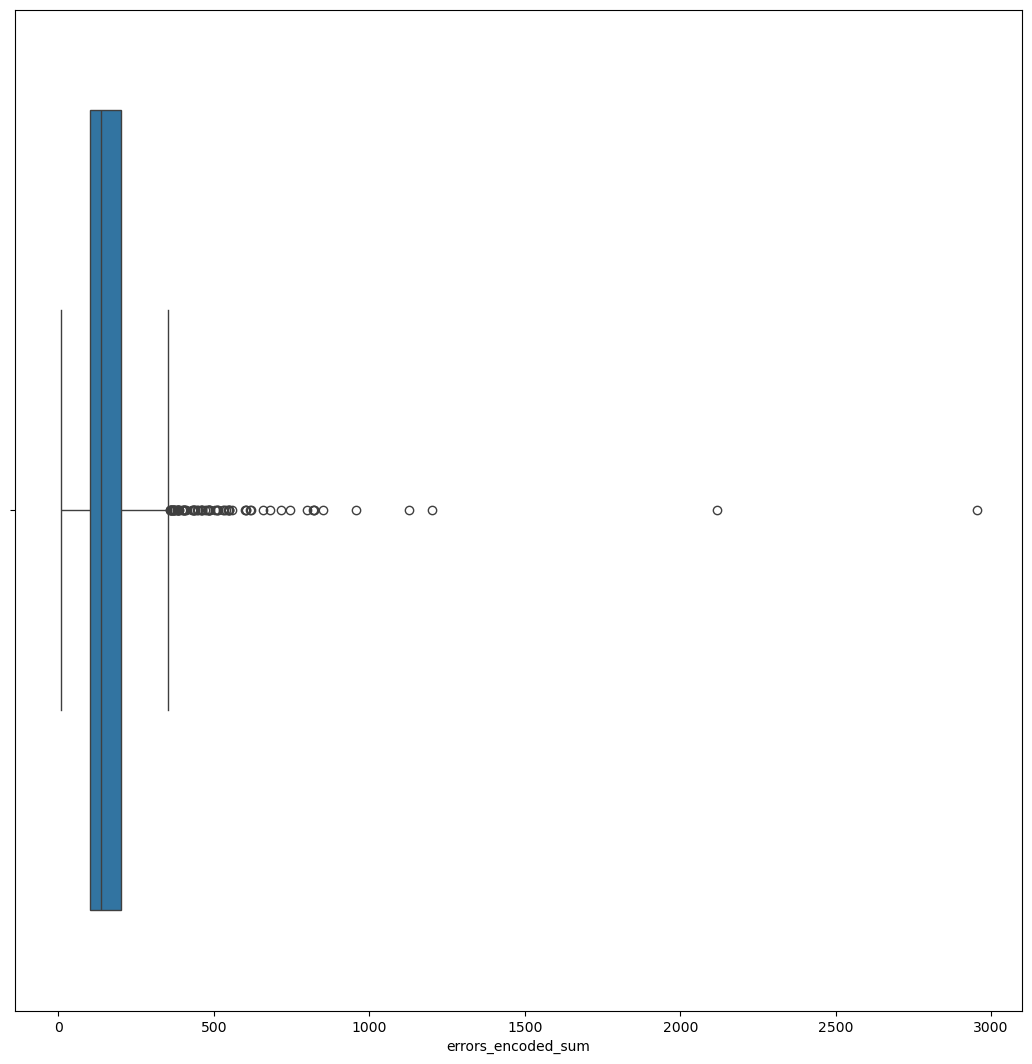

In [56]:
#the spread of error frequency
plt.figure(figsize=(13,13))
sns.boxplot(x="errors_encoded_sum",data=client_level_agg)

In [ ]:
#what is risky in a client-based transaction


In [ ]:
#transaction level risks
weights = {
    "unusual_hour":
    "large_amount":
    "non_use_chip":
    "rare_merchant":
    "rare_merchant_city":
    "double_Transaction":
}

#rule-based risk scoring
def assign_risk_score(row):
    # Unusual hour (0-4)
    unusual_hour = 1 if row['hour'] in [0, 1, 2, 3, 4] else 0

    #  Large amount (>5000)
    large_amount = 1 if row['amount'] > 5000 else 0

    #  Non-use of chip (i.e. online or swipe transaction)
    non_use_chip = 1 if (row['use_chip_Online Transaction'] == 1 or row['use_chip_Swipe Transaction'] == 1) else 0

    #  Rare merchant (merchant_id appears only once across dataset)
    rare_merchant = 1 if merchant_counts[row['merchant_id']] == 1 else 0

    # Rare merchant city (merchant_city appears only once)
    rare_merchant_city = 1 if city_counts[row['merchant_city']] == 1 else 0

    #  Duplicate transaction (same amount + merchant + hour for same client)
    key = (row['client_id'], row['amount'], row['merchant_id'], row['hour'])
    double_transaction = 1 if transaction_counts[key] > 1 else 0

    # Total score
    score = (
        unusual_hour * weights['unusual_hour'] +
        large_amount * weights['large_amount'] +
        non_use_chip * weights['non_use_chip'] +
        rare_merchant * weights['rare_merchant'] +
        rare_merchant_city * weights['rare_merchant_city'] +
        double_transaction * weights['double_transaction']
    )

    return score



In [ ]:
#storing client history in a dictionary
client_histories = {}

for client_id, group in df.groupby('client_id'):
    client_histories[client_id] = {
        'merchant_id_history': group['merchant_id'].unique().tolist(),
        'merchant_state_history': group['merchant_state'].unique().tolist(),
        'card_id_history': group['card_id'].unique().tolist(),
        'transaction_type_history': group[['use_chip_Chip Transaction', 'use_chip_Online Transaction', 'use_chip_Swipe Transaction']]
                                       .idxmax(axis=1)
                                       .unique()
                                       .tolist(),
        'error_history': group['errors'].unique().tolist(),
        'payment_hour_history': group['hour'].unique().tolist()
    }


In [ ]:
# create daily totals dict: {(client_id, date): total_amount}
daily_totals = f_data.groupby(['client_id', 'day'])['amount'].sum().to_dict()

#client-level risk
weights = {
    "new_card":
    "rare_payment_type":
    "large_amount":
    "new_merchant_id":
    "rare_client_merchant_id":
    "rare_client_merchant_state":
    "new_merchant_state":
    "frequency_spike":
    "previous_error":
    "unusual_client_hour":
    "daily_spending_spike":
    "error_frequency":
}

def risk_score_by_client(row, client_histories, agg_dict):

    client_id=row['client_id']
    
    #if card id is not in the list of card id history of client
    new_card = 1 if row['card_id'] not in client_histories[client_id]['card_id_history'] else 0
    
    #if transaction type is the least used by the client
    rare_payment_type = 1 if row['card_id'] != agg_dict['least_card_id'] else 0
    
    #if the amount is larger than the client amount range
    amount_mean = agg_dict['amount_mean']
    amount_std = agg_dict['amount_std']
    outlier_amount = 1 if (row['amount'] > amount_mean + amount_std * 2) else 0
    
    #if the merchant id is not in the list of merchant id history of client
    new_merchant_id = 1 if row['merchant_id'] not in client_histories[client_id]['merchant_id_history'] else 0
    
    #if the merchant state is not in the list of merchant state history of client
    new_merchant_state = 1 if row['merchant_state'] not in client_histories[client_id]['merchant_state_history'] else 0
    
    #if the merchant state is rare in the history of client
    rare_client_merchant_id = 1 if row['merchant_id'] == agg_dict['rare_merchant_id'] else 0
    
    #if the merchant id is rare in the history of client
    rare_client_merchant_state = 1 if row['merchant_state'] == agg_dict['rare_merchant_state'] else 0
    
    #if the addition of amount in the transaction to total amount of a day leads to a daily spending that is higher than the clients agg daily spending
    client_day_key = (row['client_id'], row['date'])
    
    current_total = daily_totals.get(client_day_key, 0) + row['amount'] #add what has been spent so far with current amount to be spent
    daily_spending_spike = 1 if current_total > agg_data['daily_spending_mean'] else 0

    #if the hour of transaction is rare or not in the history of transaction time of client
    unusual_client_hour = 1 if (row['hour'] == agg_dict['unusual_client_hour'] || row['hour'] is not in client_histories[client_id]['payment_hour_history']) else 0
    
    #if the transaction leads a frequency that is 3 times higher than the clients freq_per_hour
    frequency_spike = 1 if row['hour_freq'] > 3 * agg_dict['freq_per_hour'] else 0
    
    #if clients error_encoded sum is greater than 1000(the oulier value in the dataset)
    error_frequency = 1 if row['errors_encoded_sum'] >= 1000 else 0

    total_score = (
        new_card +
        rare_payment_type +
        large_amount +
        new_merchant_id +
        new_merchant_state +
        rare_client_merchant_id +
        rare_client_merchant_state +
        unusual_client_hour +
        frequency_spike +
        error_frequency
    )
    return total_score